In [1]:
import dynamics as dn
from pykep.core import par2ic, MU_EARTH
import numpy as np

%matplotlib inline

R_EARTH = 6378
MU_EARTH = MU_EARTH * 1e-9

# initial conditions
h = 400  # km  height for perigee
e = 0.3
a = (R_EARTH + h) / (1 - e)
i = 0.6
W = 0
w = 0
E = 0
oe1 = np.array([a, e, i, W, w, E])
oe2 = np.array([a, e+0.02, i+0.001, W, w, E])
r0_1, v0_1 = par2ic(oe1, MU_EARTH)
r0_2, v0_2 = par2ic(oe2, MU_EARTH)
x0_1 = np.hstack([r0_1, v0_1])
x0_2 = np.hstack([r0_2, v0_2])



In [2]:
T = 2 * np.pi * np.sqrt(a**3/MU_EARTH)
tspan = np.linspace(0, 1.0 * T, 100)
s1 = dn.propagate_absolute_orbit(x0_1, tspan, dn.zero_control, MU_EARTH)
s2 = dn.propagate_absolute_orbit(x0_2, tspan, dn.zero_control, MU_EARTH)

/Users/keidaiiiyama/Dropbox/Classes/1_3_Spring2022/AA203/AA203_FinalProject/dynamics.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v_rho_RSW = M_ECI2RSW @ (v_chaise - v_target).reshape((3,1)) - np.array([-n_target * r_rho_RSW[1], n_target*r_rho_RSW[0], 0]).reshape((3,1))


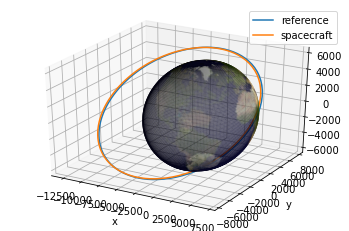

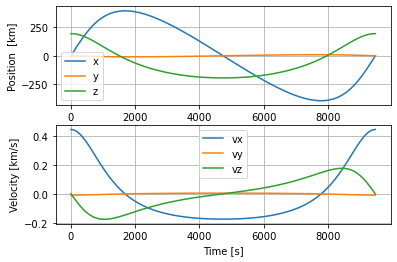

In [3]:
# Plot orbit
dn.plot_orbits(s1,s2)

# plot relative orbit
dn.plot_relative_orbit_from_abs(tspan, s1, s2)